# **INTRODUCTION**
Suicide is an imperative factor of public health issue and it is also considered as leading causes of deaths in the United States. With the way [suicide trend]('https://afsp.org/about-suicide/suicide-statistics/') is perpetuating, it accounts for a complex global issue that has increased by 24% from 1999 to 2014 regardless of sex, age, and origin. The World Health Organization (WHO) estimates that about one million suicide cases each year which accounts for a global mortality rate of 16 people per 100,000 or 1 death every 40 seconds. It is said that the victims were all diagnosed with a severe mental illness due to certain traumatic experiences in life like loss, hopelessness, physical illness and despair. This project will be used to create awareness and serve as a platform to conduct further analysis using the data to eradicate suicides completely.
## **DATA**
With the help of the [dataset]('https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016') Suicide Rate taken from [Kaggle.com]('https://kaggle.com') that comprises of socio-economic status, origin, age-group and gender by year and country with 27,820 records.

## **HYPOTHESIS**
**Ho**: The number of suicide rate will remain constant in male and female through the years 2000 to 2015.

**Ha**: There will be a positive and significant increase in the number of suicides by male and female from 2000 to 2016.

## **Method Of Testing**

To begin with, the data is cleaned to obtain the unique values of the various columns for visualization. The first part of the project will have plots showing the suicide rates correlation, trends over years by male and female, country-wise, continent wise, influence of GDP per capita and death per 100k in population.

The second part of the project will contain the testing where the difference in number of suicides by male and female from 2000 to 2015 is checked for normality. The null hypothesis is checked for significant difference to continue the experimental design to find the  95% confidence interval.

In [1]:
# Initialize the environment by importing the necessary libraries.
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
suicide_data = pd.read_csv('master.csv')
suicide_data.info()
suicide_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
## Getting rid of the null values.
suicide_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Data Cleaning:
1)	Dropping the null values.

2)	Removing strings from numbers.

3)	Dropping the columns with high null values.

4)	Creating a column ‘continent’ for detailed information


In [5]:
## As you can see HDI consists of mostly null values and 'country-year' column is not necessary.
suicide_data.drop(['HDI for year','country-year'],  inplace = True, axis=1)

In [6]:
## Renaming the column names for better understanding.
suicide_data = suicide_data.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'})

In [7]:
## You might have noticed the strings in gdp per year. We will remove them for testing.
suicide_data['gdp_for_year'].head()

0    2,156,624,900
1    2,156,624,900
2    2,156,624,900
3    2,156,624,900
4    2,156,624,900
Name: gdp_for_year, dtype: object

In [8]:
suicide_data.gdp_for_year = suicide_data.gdp_for_year.str.replace(',','')
suicide_data.gdp_for_year = pd.to_numeric(suicide_data['gdp_for_year'], errors='coerce')

In [9]:
suicide_data['gdp_for_year'].head()

0    2156624900
1    2156624900
2    2156624900
3    2156624900
4    2156624900
Name: gdp_for_year, dtype: int64

In [10]:
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [11]:
suicide_data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Suicide is not just a nation wide issue, lets group them by continents to see how they have affected the suicide rates. The countries have been grouped by their respective continents.
Each continent is represented by a number that denotes the country's continent.

In [12]:
## Classifying the data's countries into its continents

Asia = ['Armenia', 'Bahrain', 'Georgia', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'United Arab Emirates', 'Uzbekistan']
Europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic','Denmark','Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland','Ireland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta','Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia','Spain','Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
North_America = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
South_America = ['Argentia', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Turkmenistan', 'Uruguay']
Oceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']
Africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa']

country_world = []
for i in range(len(suicide_data)):
    
    if suicide_data['country'][i] in Asia:
        country_world.append('Asia')
    elif suicide_data['country'][i] in Europe:
        country_world.append('Europe')
    elif suicide_data['country'][i] in North_America:
        country_world.append('North_America')
    elif suicide_data['country'][i] in South_America:
        country_world.append('South_America')
    elif suicide_data['country'][i] in Oceania:
        country_world.append('Oceania')
    else:
        country_world.append('Africa')
suicide_data['continents'] = country_world

The data is now clean and can be used for visualization and hypothesis testing.

In [13]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation,continents
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,Europe


## Visualization using seaborn and motplotlib

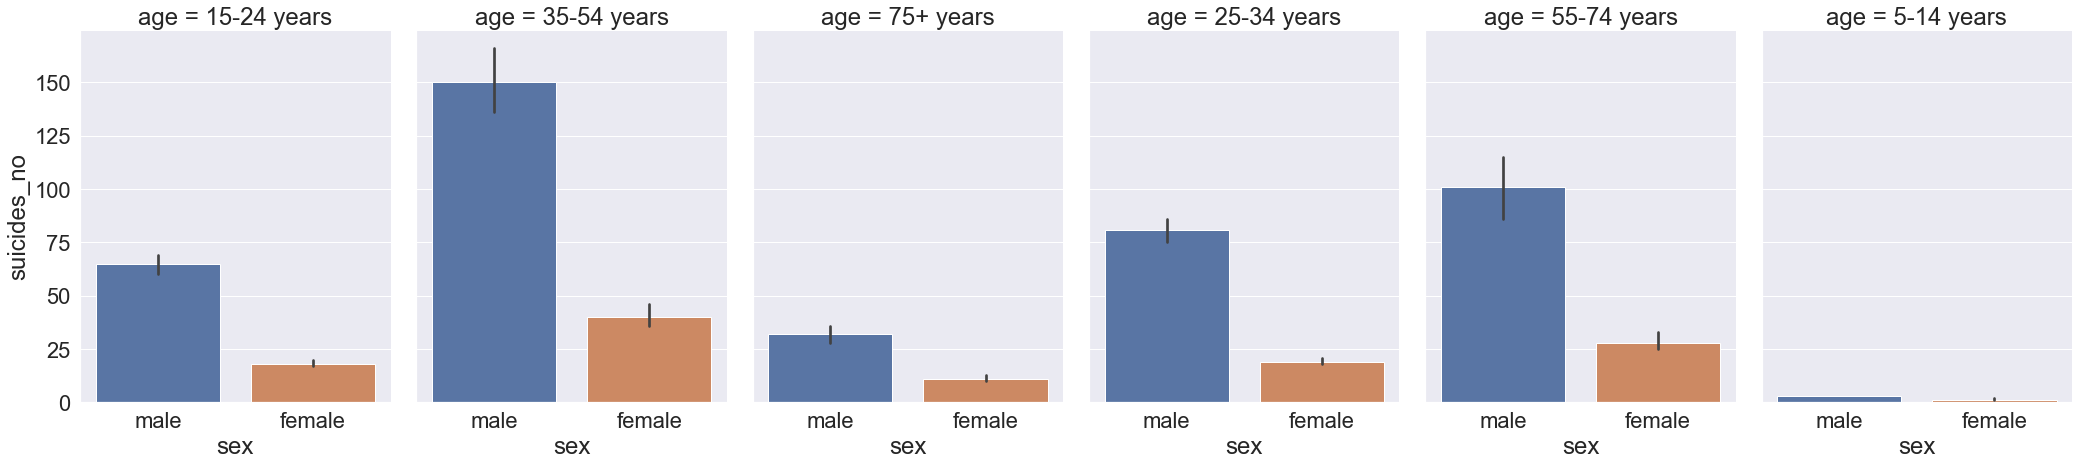

In [14]:
sns.set(font_scale=2)
sns.catplot(x='sex', y='suicides_no',col='age', data=suicide_data, estimator=np.median,height=7, aspect=.7,kind='bar')


Amount of suicides comitted by male population are greater than that of female population over the years.

We run a For-loop to get a sum of the suicide numbers for the each unique age group. 

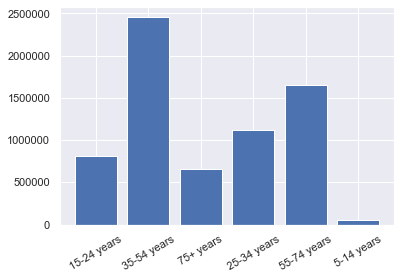

In [15]:
suicides_no_age = []

for a in suicide_data['age'].unique():
    suicides_no_age.append(sum(suicide_data[suicide_data['age'] == a]['suicides_no']))
sns.set(font_scale=1)
plt.bar(suicide_data['age'].unique(), suicides_no_age,)
plt.xticks(rotation=30)
plt.show()


We run a For-loop to get a sum of the suicide numbers for the each unique year group.

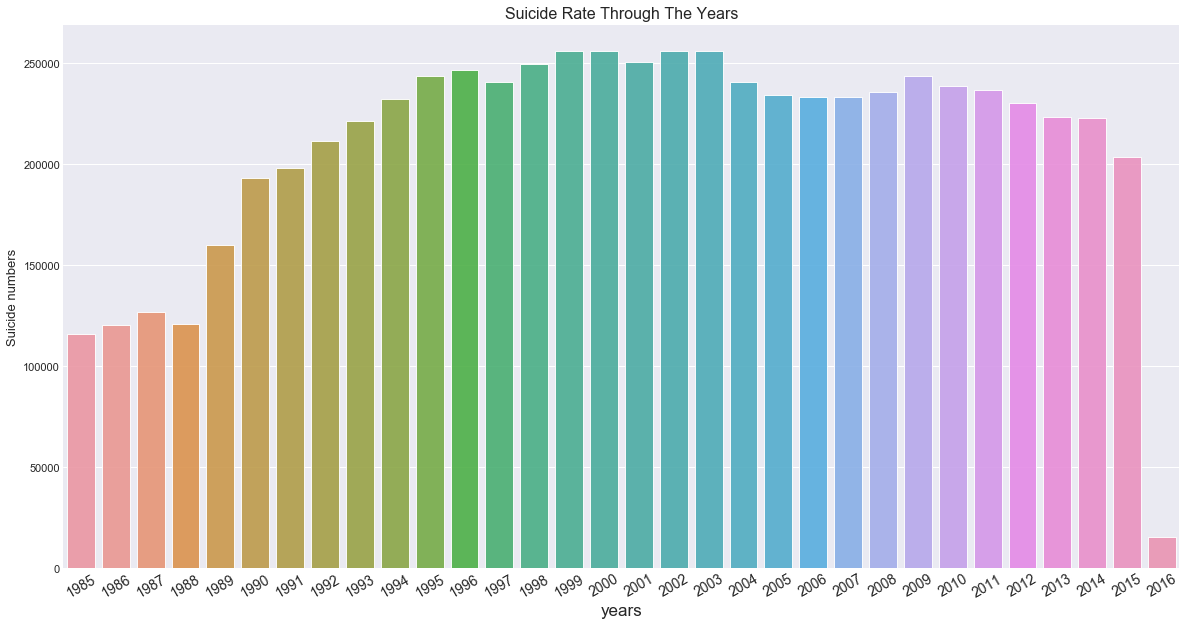

In [16]:
suicides_no_year = []

for a in suicide_data['year'].unique():
    suicides_no_year.append(sum(suicide_data[suicide_data['year'] == a]['suicides_no']))


    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(x= suicide_data['year'].unique(), y= suicides_no_year, alpha=0.9)

# Add legend
plt.xlabel('years', fontsize=17)
plt.ylabel('Suicide numbers', fontsize=13)
plt.title('Suicide Rate Through The Years', fontsize=16)

plt.xticks(rotation = 30, fontsize=14)
plt.show()



The age-groups of 35-54 years have been affected the most by suicides. followed by age group 55-74 years.

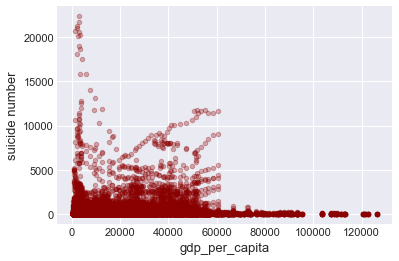

In [17]:
## Plotting the suicide rates based on the gdp_for_year

sns.regplot(x=suicide_data['gdp_per_capita'], y=suicide_data['suicides_no'], marker= 'o',fit_reg = False, scatter_kws={"color":"darkred","alpha":0.3,"s":20})
plt.xlabel('gdp_per_capita',fontsize=13)
plt.ylabel('suicide number', fontsize=13)
plt.show()
fontsize=12
#sns.plt.show()


It can be noted that for a country with gdp for year as less as 0.00*10^13 - 0.50x10^13 has the highest suicide numbers.

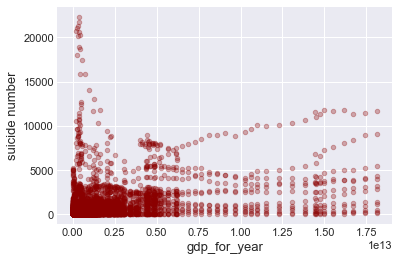

In [18]:
sns.regplot(x=suicide_data['gdp_for_year'], y=suicide_data['suicides_no'], marker= 'o', fit_reg = False, scatter_kws={"color":"darkred","alpha":0.3,"s":20})
plt.xlabel('gdp_for_year',fontsize=13)
plt.ylabel('suicide number', fontsize=13)
plt.show()
plt.show()

Gdp for the year as low as 0.00*10^13 to 0.50x10^13 has the highest suicide numbers.

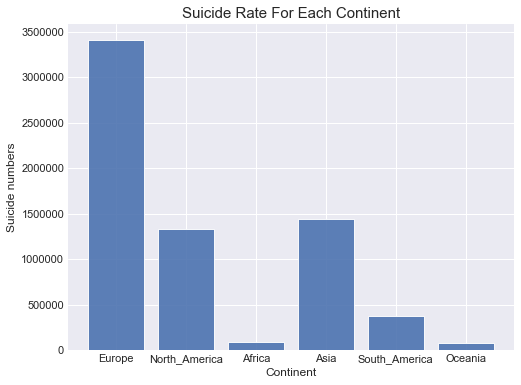

In [19]:
suicides_no_continent = []

for a in suicide_data['continents'].unique():
    suicides_no_continent.append(sum(suicide_data[suicide_data['continents'] == a]['suicides_no']))
plt.figure(figsize=(8,6))    
plt.bar(suicide_data['continents'].unique(), suicides_no_continent,alpha=0.9)

plt.title('Suicide Rate For Each Continent', fontsize = 15)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Suicide numbers', fontsize=12)
plt.show()

It can be noted that Europe ('2') has the Highest amount of suicides compared to other continents.

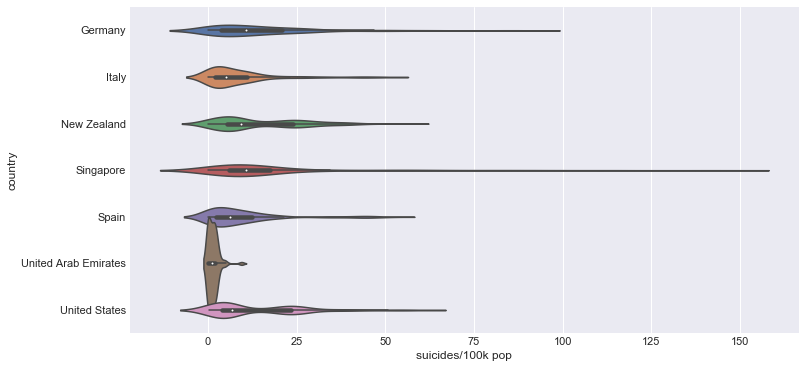

In [20]:
countries = ['United Arab Emirates', 'Germany', 'Italy', 'United States', 'Singapore', 'New Zealand', 'Spain']
suicide_data_7 = suicide_data[[suicide_data['country'][i] in countries for i in range(len(suicide_data))]]

plt.figure(figsize=(12,6))
sns.violinplot('suicides/100k pop','country', data = suicide_data_7, width=2)

Singapore has the highest suicide per 100k population followed by Germany

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

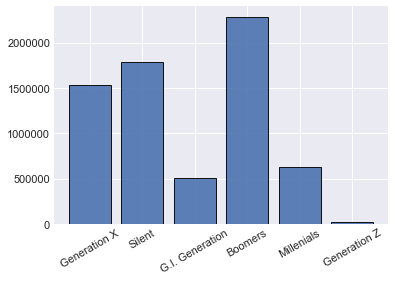

In [21]:
suicides_no_generation = []

for a in suicide_data['generation'].unique():
    suicides_no_generation.append(sum(suicide_data[suicide_data['generation'] == a]['suicides_no']))
    
plt.bar(suicide_data['generation'].unique(), suicides_no_generation, edgecolor='black', alpha=0.9)
plt.xticks(rotation=30)

Boomers generation had the highest suicide rate.

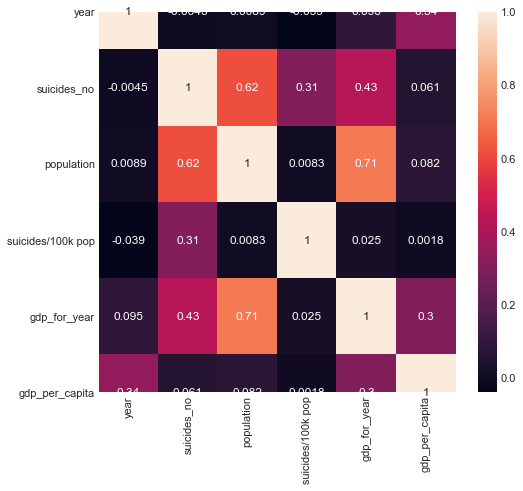

In [22]:
plt.figure(figsize=(8,7))
sns.heatmap(suicide_data.corr(),annot=True)

## Hypothesis test: Male and Female suicide numbers from 2010-2016 has increased.
## Null hypothesis: Male and Female suicide numbers from 2010-2016 has reduced


_2010 = suicide_data[suicide_data['year']==2010]

suicide_data_unique = _2010.pivot(columns='year',  values='suicides_no')
suicide_data_unique.head()

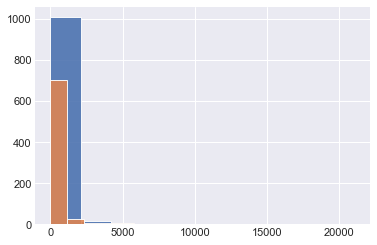

DescribeResult(nobs=1032, minmax=(0, 21063), mean=247.89922480620154, variance=1030250.9966240347, skewness=11.934666176566006, kurtosis=196.08955099279348)
DescribeResult(nobs=744, minmax=(0, 11634), mean=273.7096774193548, variance=755125.6087352928, skewness=7.221281259315286, kurtosis=67.80125290250194)


In [23]:
# Q) to mentor: how do you know if there is an increase in the suicide numbers on not? 


y_2000=suicide_data[suicide_data['year']==2000]
y_2015=suicide_data[suicide_data['year']==2015]

plt.hist(y_2000['suicides_no'], alpha=0.9)
plt.hist(y_2015['suicides_no'], alpha=0.9)
plt.show()

print(stats.describe(y_2000['suicides_no']))
print(stats.describe(y_2015['suicides_no']))


In [24]:
print(stats.shapiro(y_2000['suicides_no']))
print(stats.shapiro(y_2015['suicides_no']))

print(stats.describe(y_2000['suicides_no']))
print(stats.describe(y_2015['suicides_no']))

(0.21945786476135254, 0.0)
(0.31664562225341797, 0.0)
DescribeResult(nobs=1032, minmax=(0, 21063), mean=247.89922480620154, variance=1030250.9966240347, skewness=11.934666176566006, kurtosis=196.08955099279348)
DescribeResult(nobs=744, minmax=(0, 11634), mean=273.7096774193548, variance=755125.6087352928, skewness=7.221281259315286, kurtosis=67.80125290250194)


Checking Shapiro-Wilk stats for normality returns a W value of 0.21 and 0.31, p values of 0.0 which clearly means they are not normally distributed. Static value > 1.96 and P < 0.05 so we will reject the hypothesis

Since Its not normally distributed we will proceed to use Kruskal-Wallis to test the hypothesis of the population median.

In [25]:
stats.kruskal(
    y_2000['suicides_no'],
    y_2015['suicides_no'])

KruskalResult(statistic=9.174123275394075, pvalue=0.002454609247623136)

Since the difference is really high we reject the hypothesis. We will now group the years in steps of 5 and continue with the hypothesis

In [26]:
y_2010_2015 = ['2010','2011','2012', '2013', '2014', '2015']
y_10_15 = suicide_data[suicide_data['year'].isin(y_2010_2015)]

y_2000_2005 = ['2000','2001','2002', '2003', '2004', '2005']
y_00_05 = suicide_data[suicide_data['year'].isin(y_2000_2005)]


y_00_05['year'].unique()
y_10_15['year'].unique()

array([2010, 2012, 2013, 2014, 2015, 2011])

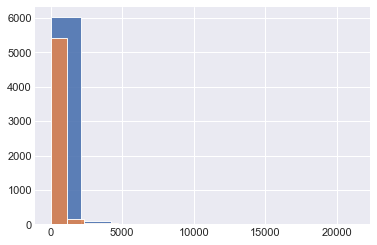

In [27]:
from matplotlib.pyplot import figure

plt.hist(y_00_05['suicides_no'], alpha =0.9, bins=10)
plt.hist(y_10_15['suicides_no'], alpha = 0.9, bins=10)

plt.show()

In [28]:
print(stats.shapiro(y_00_05['suicides_no']))
print(stats.shapiro(y_10_15['suicides_no']))

print(stats.describe(y_00_05['suicides_no']))
print(stats.describe(y_10_15['suicides_no']))

(0.22755426168441772, 0.0)
(0.29230016469955444, 0.0)
DescribeResult(nobs=6168, minmax=(0, 21262), mean=242.20071335927366, variance=951433.6853440669, skewness=11.142005661772844, kurtosis=171.8088759504485)
DescribeResult(nobs=5700, minmax=(0, 11767), mean=237.74894736842106, variance=650069.0531222468, skewness=7.802196926694767, kurtosis=78.87890779639008)


/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The kurtosis value is high - shows that the plots are non normal.

In [29]:
stats.kruskal(
    y_00_05['suicides_no'],
    y_10_15['suicides_no'])

KruskalResult(statistic=9.321350954908455, pvalue=0.002264989354700551)

In [30]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = np.sqrt(
        (sample_1_var / sample_1_n)
        + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return (
        "The difference in means at the 95% confidence interval (two-tail) is between {} and {}.".format(
            ci_lower, 
            ci_upper,
        )
    )
get_95_ci(y_00_05['suicides_no'],
      y_10_15['suicides_no'],
)

'The difference in means at the 95% confidence interval (two-tail) is between -36.556326304575876 and 27.652794322870662.'

We can interpret this result as saying that with 95% confidence, suicides from year 2000 to 2005 have suicide rates on average between 36.55 and 27.65 suicide/year higher than sucides from 2010 to 2015

We infer from the first plot that there is a significant difference from year 2000 and 2015. similarly from the last plot we can infer that there is no significant difference from the grouped years from 2000-2005 and 2010-2015. We performed the kruskal test after finding the non normality. We can reject the hypothesis and from the visualisation it is clear that there is a reduction in the suicide rates from 2000 to 2015.

### Other factors that could cause a bias in the selection

The population of different countries varies with different size, weather, population and and size ratio could possibly affect the research. The gender is only classified as male and female, however, there are more than just that. No data about their mental well being is given, and also no information about their health. There is no information about their race and ethnicity is available that could be a potential further research. 

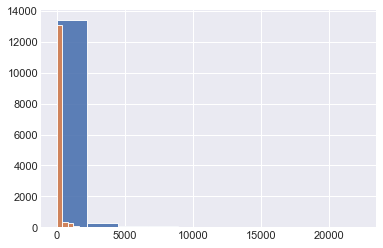

DescribeResult(nobs=13910, minmax=(0, 22338), mean=373.0345075485262, variance=1482180.8697560125, skewness=8.002522267223732, kurtosis=89.8227702928519)
DescribeResult(nobs=13910, minmax=(0, 4053), mean=112.11430625449317, variance=111216.39673974084, skewness=5.95445464738582, kurtosis=42.92702148029931)


In [31]:
suicide_male=suicide_data[suicide_data['sex']=='male']
suicide_female=suicide_data[suicide_data['sex']=='female']


plt.hist(suicide_male['suicides_no'], alpha=0.9)
plt.hist(suicide_female['suicides_no'], alpha=0.9)
plt.show()

print(stats.describe(suicide_male['suicides_no']))
print(stats.describe(suicide_female['suicides_no']))

In [32]:
print(stats.shapiro(suicide_male['suicides_no']))
print(stats.shapiro(suicide_female['suicides_no']))

stats.kruskal(suicide_male['suicides_no'], suicide_female['suicides_no'])

(0.30211055278778076, 0.0)
(0.34684157371520996, 0.0)


KruskalResult(statistic=1196.8302776262888, pvalue=2.9796756240419265e-262)

### Checking for another hypothesis test: 
If there is difference in different gender and age groups.

In [33]:
stats.kruskal(
    suicide_data.loc[suicide_data['sex'] == 'male',['age']],
    suicide_data.loc[suicide_data['sex'] == 'female',['age']])

KruskalResult(statistic=1.4967692689722934e-11, pvalue=0.9999969131360391)

### A p-value of 1 means we can accept the null hypothesis, hence not much significant difference.